<a href="https://colab.research.google.com/github/Omar-Ayman-Mohamed/Machine-learning-3rd-year/blob/main/Copy_of_A6_ASSIGN_Clustering_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and PCA

In this assignment, you will be exploring difference between clique and kmeans algorithms for clustering and will get better understanding of PCA & Kmeans algorithms by manually implementing both of them.

--------------------

In [ ]:
!pip3 install pyclustering

     |████████████████████████████████| 2.6 MB 4.5 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=43ec5aa5940a6578d3b468c9050ece0ba85c6a89f0387b263c87af8a90d6949f
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [ ]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.cluster import KMeans

In [ ]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)
#x1 = X[0]
#x2 = X[10]
#y = x1 + x2
#print(x1,x2,  y)

# Questoin 1
Scatter plot the dataset

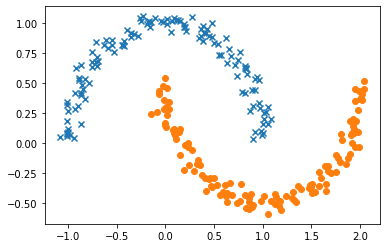

In [ ]:
import matplotlib.pyplot as plt
markers = ['x','o']
for idx,yval in enumerate(np.unique(y)):
  plt.scatter(x = X[y==yval,0],y = X[y==yval,1],marker = markers[idx])
#plt.scatter(X[200,0],X[200,1])

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

I think it will perform poorly due to data distrbution 

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train KMeans model using "k = 2".
4. Comment on the results.

as expected the kmeans performed poorly due to data distrbuition and hence negative score

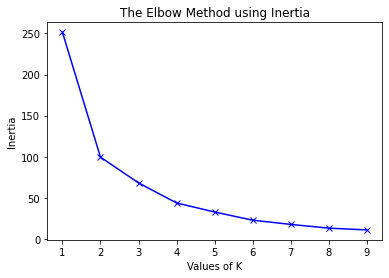

-99.48652012837258

In [ ]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	#kmeanModel.fit(X)
	inertias.append(kmeanModel.inertia_)


	mapping2[k] = kmeanModel.inertia_


plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

model = KMeans(n_clusters=2)
model.fit(X)
model.score(X)

# Question 4
1. If you are going to use clique, what is a proper threshold value for the above dataset.
2. Find the best interval value that cluster the data into two clusters, plot the results.
3. Why do you think clique performed better on this dataset in comparison with KMeans?

1-As the above dataset shows and after trying differnt values for different thersholds the best was zero as there are no apparent outliers in above dataset and when tried using thersholds greater than zero the clustring process tended to perform poorly making  more than 2 clusters or classfying them as one only

2-the best intervals where 8 and 10 so to reduce computation 8 is better

3- due to the shape of data and how the algortihm iteslf works , so it was easier for clique to cluster above dataset better

Amount of clusters: 2


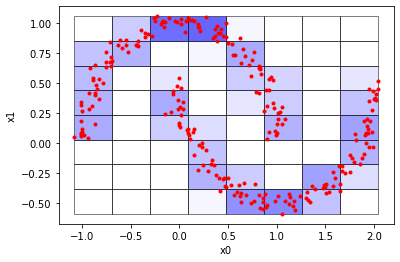

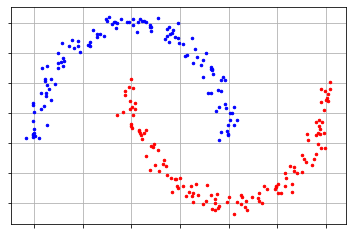

In [ ]:
intervals = 8
threshold = 0   
clique_instance = clique(X, intervals, threshold)
clique_instance.process()
clusters = clique_instance.get_clusters()  
noise = clique_instance.get_noise()     
cells = clique_instance.get_cells()    
print("Amount of clusters:", len(clusters))
clique_visualizer.show_grid(cells, X)    
clique_visualizer.show_clusters(X, clusters, noise)

# Question 5
For the following dataset
1. Run kmeans algorithm clustering using k=2.
2. Run clique algorithm using interval = 15 and threshold = 6.
3. Plot results of both algorithms.
4. Comment on the following
    * What is the number of clusters in case of clique? and why?
    * Why do kmeans fail to cluster such data?

in case of normal data kmeans works and in clique and kmeans both results are two clusters , in case of transformed data the clique produce 4 clusters due to high threshold ,the kmeans fail due to data shape and distrbution it saw only two clusters

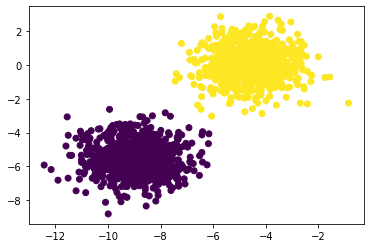

In [ ]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
#y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_aniso)
#plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)

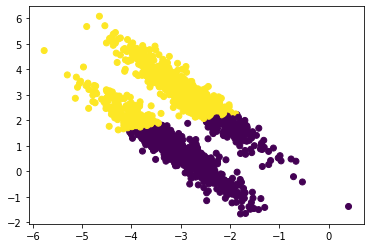

In [ ]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
#y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
#plt.scatter(X[:, 0], X[:, 1], c=y_pred)
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)

Amount of clusters: 2


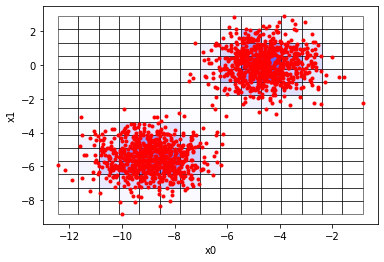

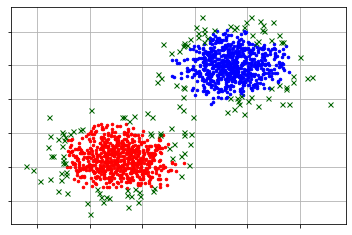

In [ ]:
intervals = 15 
threshold = 6  
clique_instance = clique(X, intervals, threshold)
clique_instance.process()
clusters = clique_instance.get_clusters()  
noise = clique_instance.get_noise()     
cells = clique_instance.get_cells()    
print("Amount of clusters:", len(clusters))
clique_visualizer.show_grid(cells, X)    
clique_visualizer.show_clusters(X, clusters, noise)

Amount of clusters: 4


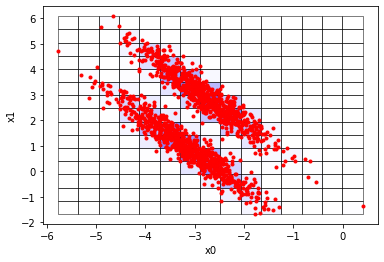

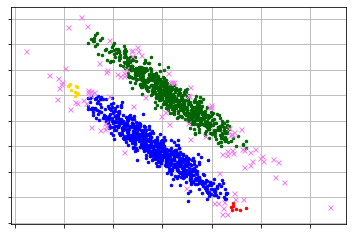

In [ ]:
intervals = 15 
threshold = 6  
clique_instance = clique(X_aniso, intervals, threshold)
clique_instance.process()
clusters = clique_instance.get_clusters()  
noise = clique_instance.get_noise()     
cells = clique_instance.get_cells()    
print("Amount of clusters:", len(clusters))
clique_visualizer.show_grid(cells, X_aniso)    
clique_visualizer.show_clusters(X_aniso, clusters, noise)

# Question 6

Write your own PCA function that will return:
* The sorted eigenvectors of principal components
* The corresponding eigenvalues
* The transformed data

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
df['target'] = cancer.target
X = pd.DataFrame(cancer.data)
y = df['target']
#X
#m = X.iloc[:,0]
g = X.iloc[:,0].mean()
z = X.iloc[:,0] - g
#print(g)
#print(z)
#print(y)

#X_fruits = df[feature_names_fruits]
#y_fruits = fruits['fruit_label']


In [ ]:
def standraize_data(x):
  #x.dropdrop(['mass', 'color_score'],axis = 1,inplace = True)

  length = x.shape[1]
  for i in range(length):
    m = x.iloc[:,i].mean()
    x.iloc[:,i] = (x.iloc[:,i] - m)
  return x
standraize_data(X)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,3.862708,-8.909649,30.830967,346.110896,0.02204,0.173259,0.211301,0.098181,0.060738,0.015912,...,9.11081,-8.347223,77.338787,1138.416872,0.029831,0.411335,0.439712,0.150794,0.170024,0.034954
1,6.442708,-1.519649,40.930967,671.110896,-0.01162,-0.025701,-0.001899,0.021251,0.000038,-0.006128,...,8.72081,-2.267223,51.538787,1075.416872,-0.008569,-0.067665,-0.030588,0.071394,-0.015076,0.005074
2,5.562708,1.960351,38.030967,548.110896,0.01324,0.055559,0.108601,0.078981,0.025738,-0.002808,...,7.30081,-0.147223,45.238787,828.416872,0.012031,0.170235,0.178212,0.128394,0.071224,0.003634
3,-2.707292,1.090351,-14.389033,-268.789104,0.04614,0.179559,0.152601,0.056281,0.078538,0.034642,...,-1.35919,0.822777,-8.391213,-312.883128,0.077431,0.612035,0.414712,0.142894,0.373724,0.089054
4,6.162708,-4.949649,43.130967,642.110896,0.00394,0.028459,0.109201,0.055381,-0.000262,-0.003968,...,6.27081,-9.007223,44.938787,694.416872,0.005031,-0.049265,0.127812,0.047894,-0.053676,-0.007166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,7.432708,3.100351,50.030967,824.110896,0.01464,0.011559,0.155101,0.089981,-0.008562,-0.006568,...,9.18081,0.722777,58.838787,1146.416872,0.008631,-0.042965,0.138512,0.106994,-0.084076,-0.012796
565,6.002708,8.960351,39.230967,606.110896,0.00144,-0.000941,0.055201,0.048991,-0.005962,-0.007468,...,7.42081,12.572777,47.738787,850.416872,-0.015769,-0.062065,0.049312,0.048194,-0.032876,-0.017576
566,2.472708,8.790351,16.330967,203.210896,-0.01181,-0.002041,0.003711,0.004101,-0.022162,-0.006318,...,2.71081,8.442777,19.438787,243.416872,-0.018469,0.055135,0.068112,0.027194,-0.068276,-0.005746
567,6.472708,10.040351,48.130967,610.110896,0.02144,0.172659,0.262601,0.103081,0.058538,0.007362,...,9.47081,13.742777,77.338787,940.416872,0.032631,0.613835,0.666512,0.150394,0.118624,0.040054


In [ ]:

def get_covariance_matrix(x_stadrantized):
  transpose = x_stadrantized.T
  covariance_x = transpose.dot(x_stadrantized)

  return covariance_x
y = standraize_data(X)
a = get_covariance_matrix(y)
#print(w)
#print(eigenValues)
#print(v)
#print(eigenVectors)



In [ ]:
from numpy.linalg import eig
def get_sorted_eigne_values_and_vectors(covar_matrix):
  eigenValues,eigenVectors=eig(covar_matrix)
  idx = eigenValues.argsort()[::-1]   
  sorted_eigenValues = eigenValues[idx]
  corresponding_eigenVectors = eigenVectors[:,idx]
  #print(sorted_eigenValues)

  return sorted_eigenValues , corresponding_eigenVectors
#y = standraize_data(X)
#a = get_covariance_matrix(y)
#get_sorted_eigne_values_and_vectors(a)
  

In [ ]:
#def pca_transform(Z,sorted_eigne_vector):
# transformed_data = Z.dot(sorted_eigne_vector)
 # return transformed_data

In [ ]:
def pca_transform(data_to_be_tranformed):
  x_stdr  = standraize_data(data_to_be_tranformed)
  Z  =  get_covariance_matrix(x_stdr)
  eigenvalues ,p = get_sorted_eigne_values_and_vectors(Z)
  #print(eigenvalues)
  transformed_data = Z.dot(p)
  return transformed_data,p,eigenvalues
pca_transform(X)




(              0             1              2             3             4   \
 0   1.282079e+06  3.856113e+04   -4934.287430  -1062.765530   -803.347965   
 1   5.536862e+05 -1.196482e+04   -2540.577863 -11249.540120  10041.532998   
 2   8.841639e+06  2.605386e+05  -28651.850810 -10221.054253  -7100.482333   
 3   1.302757e+08  3.536889e+06  -11151.562561   1223.375260   1043.103105   
 4   1.068001e+03 -6.153232e+01      29.047711    -10.682676    -13.119149   
 5   1.021533e+04 -1.116353e+01      40.679106    -93.273508    -57.241967   
 6   2.065448e+04  3.119997e+02     106.336726   -105.779482    -49.737975   
 7   1.204403e+04  1.924520e+02      14.410852    -38.715253    -25.647585   
 8   1.784152e+03 -1.048126e+02      56.484955    -30.010241    -21.230427   
 9  -6.608109e+02 -6.693126e+01      20.243815     -6.183103     -4.690744   
 10  7.908461e+04 -2.236726e+02    2423.278536   -126.837263    -66.474062   
 11 -1.640926e+04  1.446482e+03    2492.123932   -702.752398    

# Question 7
Write your own K-means clustering, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [ ]:
import random
def randomize_center(data,num_clusters):
    random_centers_array  = np.zeros((num_clusters,2))
    for i in range(num_clusters) :
      random_center_index = random.randint(0,len(data))
      random_centers_array[i]  =data[random_center_index]
    return random_centers_array
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)
lando = randomize_center(X,5)
print(lando)

[[ 0.91773907  0.43847626]
 [ 1.75437757 -0.10215986]
 [-0.10694199  1.03645475]
 [-0.35068987  0.88288025]
 [ 0.01032525  0.29926937]]


In [ ]:
def label_into_cluster(centriods,num_clusters,data):
   clusters_array  = np.zeros(len(data))
   for k in range (len(data)):
     min_array = np.zeros(5)

     for j in range(num_clusters ):
      part_1 = ((data[k,0]-centriods[j,0])**2)
      part_2 = ((data[k,1]-centriods[j,1])**2)
      min_array[j] = part_1 + part_2
     ind = np.argmin(min_array)
     clusters_array[k] = ind 
    
  #   h = min_array[0]
    # for i in range(0,num_clusters):
     #  if(h > min_array[i+1]):
      #   h = min_array[i+1]
      #   index = i+1
  # clusters_array[k] = index
   #print(clusters_array)
   return clusters_array
rand_sam = randomize_center(X,5) 
mapped_array = label_into_cluster(rand_sam,5,X)

In [ ]:
def get_new_centers(cluster_array_data,num_clusters,data):
  sum_array  = np.zeros((num_clusters,2))
  count_array = np.zeros(num_clusters)
  mean_array =  np.zeros((num_clusters,2))
  for i in  range(num_clusters ):
    count = 0
    sum = 0
    for j in range (len(data)):
      if (cluster_array_data[j] == i):
        sum = sum + data[j]
        count = count +1
    sum_array[i] = sum
    count_array[i] = count
  #print(sum_array)
  for k in range(len(sum_array)):
    mean_array[k] = sum_array[k] / count_array[k]
  #print(mean_array)
  return mean_array
#print(lando)
#print(get_new_centers(label_into_cluster(lando,5,X),5,X))
bn = get_new_centers(mapped_array,5,X)
#print(bn)
#print(random)

In [ ]:

def kmeans_manual (num_clusters,data):
  clusters_centers_array= np.zeros((num_clusters,2))
  clusters_centers_array  = randomize_center(data,num_clusters) 


  for counter in range(0,300):
    labeled = label_into_cluster(clusters_centers_array,num_clusters,data)
    #print(clusters_centers_array)
    clusters_centers_array = get_new_centers(labeled,num_clusters,data)
    #print(clusters_centers_array)

  return clusters_centers_array


#  min_array = np.zeros(len(data))
 # for k in range (len(data)):
  #  for j in range(num_clusters ):
   #   ha = ((data[k,0]-clusters_centers_array[j,0])**2)
    #  ma = ((data[k,1]-clusters_centers_array[j,1])**2)
     # min_array[j] = ha + ma
    #aofmin= np.where(min_array == np.amin(min_array))
    #index = aofmin[0]
    #print(index)
    #min_array = np.zeros(250)
   # clusters_array[index,k] = data[k]
 # print(clusters_array)
#X, y = make_moons(n_samples=250, noise=0.05, random_state=42)
#kmeans_manual(2,X)
kmeans_manual(5,X)


array([[ 1.81101757, -0.01550846],
       [ 0.4044286 ,  0.83014462],
       [-0.73571022,  0.55087457],
       [ 0.11383049,  0.10270603],
       [ 0.90843351, -0.27052084]])

In [ ]:
#X, y = make_moons(n_samples=250, noise=0.05, random_state=42)
zo = kmeans_manual(5,X)
kn = KMeans(n_clusters=5, random_state=42).fit(X)
print(kn.cluster_centers_)
print(zo)

[[ 0.58800274 -0.30922644]
 [ 1.74681359 -0.0707378 ]
 [ 0.02089979  0.78442184]
 [ 0.85486776  0.4469646 ]
 [-0.83722492  0.45784028]]
[[-0.83722492  0.45784028]
 [ 0.85486776  0.4469646 ]
 [ 1.74681359 -0.0707378 ]
 [ 0.02089979  0.78442184]
 [ 0.58800274 -0.30922644]]


here the results are the same just different order :)
below screenshot in case notebook caused strange behaivuor
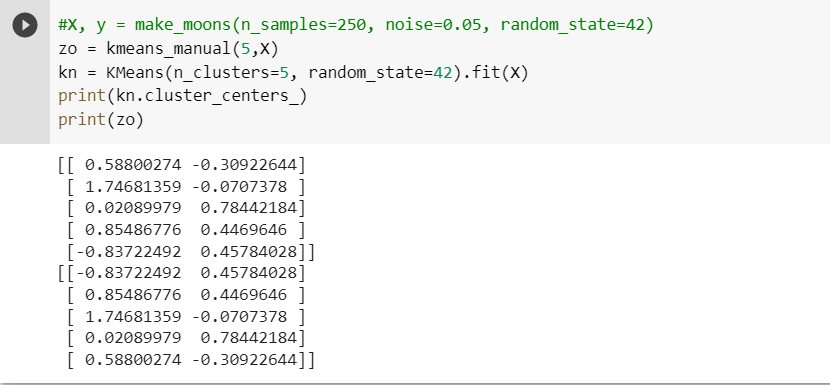